### Machine & Deep Learning 101

##### ライブラリの紹介
- Maschine learning
    - scikit-learn (OSS) 
    - NumPy
    - Pandas
    - SciPy
    - dlib
  
- Deep learning
    - TensorFlow (Google,2015) -- Keras (Google,2015)  
    - Apache MXNet
    - Deeplearning 4j (for Java)
    - PyTorch (Facebook,2016)
    - JAX (Google,2018) 

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

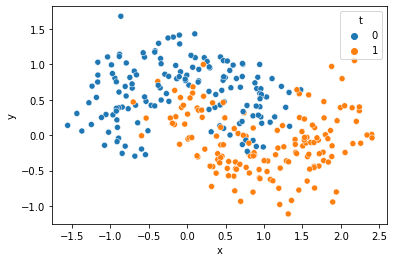

In [143]:
np.random.seed(123)  # seed値を決めておかないと毎回得られる乱数が異なってしまって学習が比較できない。
tf.random.set_seed(123)

# 1. Data set
N = 300
x, t = datasets.make_moons(N, noise=0.3)

df = pd.DataFrame(x,columns=['x','y'])
df2 = pd.DataFrame(t,columns=['t'])
df = pd.concat([df, df2],axis=1)

sns.scatterplot(x='x', y='y', hue='t', data=df)

t = t.reshape(N, 1)
x_train, x_test, t_train, t_test = \
    train_test_split(x, t, test_size=0.2)

In [144]:
# 2. Model
model = Sequential() #vacant model
model.add(Dense(3, activation='sigmoid')) # add new layer -- 3 layer Perceptron
model.add(Dense(1, activation='sigmoid')) # add new layer -- 1 layer for output

In [145]:
# 3. Learning
optimizer = optimizers.SGD(learning_rate = 0.1) # Stochastic Gradient Descent 確率的勾配降下法 (Default lerning rate = 0.01)
model.compile(optimizer, loss = 'binary_crossentropy',metrics = ['accuracy']) # 交差エントロピー誤差関数, 評価指標は正解率
model.fit(x_train, t_train, epochs = 100, batch_size = 10, verbose = 1) #model.fitで学習開始

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6322 - accuracy: 0.8083
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7792
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7917
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5737 - accuracy: 0.7917
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7833
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7875
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7875
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7917
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7917
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7875
Epoch 11/

In [146]:
# 4. Evaluation
loss,acc = model.evaluate(x_test, t_test, verbose = 0)
print('test_loss: {:.3f}, test_acc: {:.3f}'.format(loss,acc))

test_loss: 0.304, test_acc: 0.883
